In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
batting = pd.read_csv("Downloads/Stats 131/baseballdatabank-2019.2/core/batting.csv")
salaries = pd.read_csv("Downloads/Stats 131/baseballdatabank-2019.2/core/Salaries.csv")
appear = pd.read_csv("Downloads/Stats 131/baseballdatabank-2019.2/core/Appearances.csv")
fielding = pd.read_csv("Downloads/Stats 131/baseballdatabank-2019.2/core/Fielding.csv")

In [3]:
#baseball = batting.merge(right = fielding, on=["yearID", "playerID", "teamID", "lgID"])
#baseball.head()

In [4]:
baseball = batting.merge(right = appear, on=["yearID", "playerID", "teamID", "lgID"])
baseball.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,22,0,3,0,0,0,0,0.0,0.0,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,2,0,0,0,29,0,29,0.0,0.0,0.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,2,20,0,1,0,0,1,0.0,0.0,0.0


In [5]:
baseball = baseball.merge(right = salaries, on=["yearID", "playerID", "teamID", "lgID"])
baseball.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,salary
0,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,170000
1,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,147500
2,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,7,60,0,0,0,0,0.0,11.0,9.0,237000
3,alexado01,1985,1,TOR,AL,36,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,875000
4,allenne01,1985,1,SLN,NL,23,2,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,750000


In [6]:
baseball = baseball.loc[baseball.yearID > 2006]
baseball.head()


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,salary
17394,aardsda01,2007,1,CHA,AL,25,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,387500
17395,abreubo01,2007,1,NYA,AL,158,605,123,171,40,...,0,0,0,0,157,157,1.0,4.0,1.0,15000000
17396,accarje01,2007,1,TOR,AL,64,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,392200
17397,affelje01,2007,1,COL,NL,75,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,1250000
17398,alfonan01,2007,1,PHI,NL,61,1,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,380000


In [7]:
#baseball = baseball.loc[baseball.POS !=  "P"]
#baseball.shape

In [8]:
baseball['G_all'].quantile([0,.25,0.36,.5,0.6,.75,1])

0.00      1.0
0.25     30.0
0.36     36.0
0.50     60.0
0.60     72.0
0.75    108.0
1.00    163.0
Name: G_all, dtype: float64

In [9]:
baseball = baseball.loc[baseball.G_all >= 102]
baseball.shape

(2214, 40)

In [10]:
baseball['salary'].quantile([.25,.5,.75,1])
Q1 = baseball['salary'].quantile([.25,.5,.75,1])[0.25]
Q2 = baseball['salary'].quantile([.25,.5,.75,1])[0.5]
Q3 = baseball['salary'].quantile([.25,.5,.75,1])[0.75]
Q4 = baseball['salary'].quantile([.25,.5,.75,1])[1]

In [11]:
baseball["BA"] = baseball.H/baseball.AB
baseball_1st = baseball.loc[baseball.salary <= Q1]
baseball_2nd = baseball.loc[baseball.salary <= Q2].loc[baseball.salary > Q1]
baseball_3rd = baseball.loc[baseball.salary <= Q3].loc[baseball.salary > Q2]
baseball_4th = baseball.loc[baseball.salary > Q3 ]
print(baseball_4th.shape)
print(baseball_3rd.shape)
print(baseball_2nd.shape)
print(baseball_1st.shape)

(554, 41)
(550, 41)
(554, 41)
(556, 41)


In [12]:
#baseball.loc[baseball.POS ==  "DH"].shape


In [13]:
baseball.shape

(2214, 41)

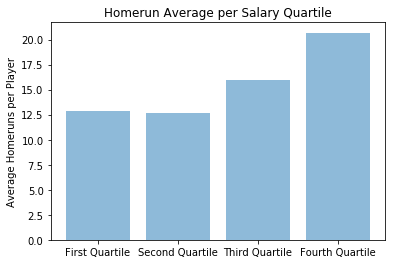

12.899280575539569
12.703971119133573
15.938181818181818
20.684115523465703


In [14]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.HR.mean(),baseball_2nd.HR.mean(),baseball_3rd.HR.mean(),baseball_4th.HR.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Homeruns per Player')
plt.title('Homerun Average per Salary Quartile')

plt.show()

print(baseball_1st.HR.mean())
print(baseball_2nd.HR.mean())
print(baseball_3rd.HR.mean())
print(baseball_4th.HR.mean())

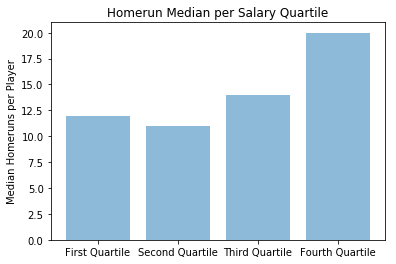

In [15]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.HR.median (),baseball_2nd.HR.median(),baseball_3rd.HR.median(),baseball_4th.HR.median()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Median Homeruns per Player')
plt.title('Homerun Median per Salary Quartile')

plt.show()

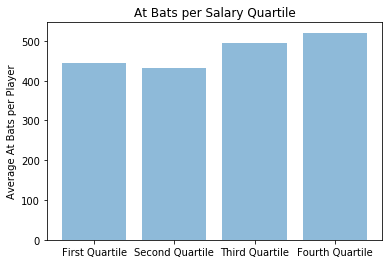

In [16]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.AB.mean(),baseball_2nd.AB.mean(),baseball_3rd.AB.mean(),baseball_4th.AB.mean()]




plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average At Bats per Player')
plt.title('At Bats per Salary Quartile')

plt.show()

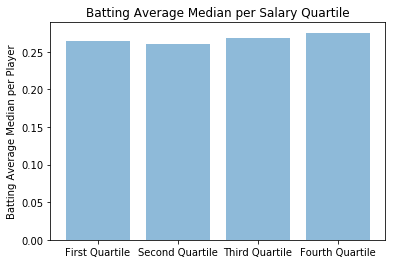

In [17]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.BA.median (),baseball_2nd.BA.median(),baseball_3rd.BA.median(),baseball_4th.BA.median()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Batting Average Median per Player')
plt.title('Batting Average Median per Salary Quartile')

plt.show()



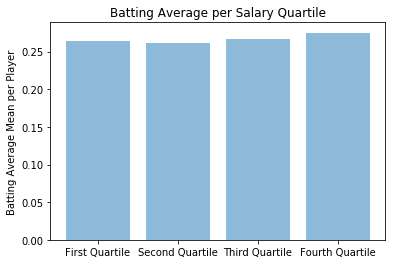

In [18]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.BA.mean(),baseball_2nd.BA.mean(),baseball_3rd.BA.mean(),baseball_4th.BA.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Batting Average Mean per Player')
plt.title('Batting Average per Salary Quartile')

plt.show()